# QbE-STD data flow simulation

## 1. Simulate user upload and ID assignment

- queries.wav and tests.wav uploaded to current directory
- Upload procedure downsamples to 16000 Hz and converts to mono

In [33]:
import IPython.display as ipd

ipd.Audio("queries.wav")

In [39]:
ipd.Audio("tests.wav")

In [70]:
database = {}

# Assign IDs on file upload
database["files"] = [
    {"file_id": "a2eb25", "file_name": "queries.wav", "file_type": "query", "file_hash": "a490f67f51c65d13c9bb69df30a3bf94" },
    {"file_id": "01d30e", "file_name": "tests.wav", "file_type": "test", "file_hash": "a87093d0206c7c0ad194d8d6473a9109"}
]

## 2a. Simulate query labelling

In [71]:
# Send from front end
database["queries"] = [
    {"file_id": "a2eb25", "start_time": 0.935, "end_time": 1.493, "label": "hello" },
    {"file_id": "a2eb25", "start_time": 2.490, "end_time": 2.966, "label": "car" }
]

Generate IDs on database insert

In [72]:
# Generate IDs and insert into database
database["queries"] = [
    {"query_id": "f8fd28", "file_id": "a2eb25", "start_time": 0.935, "end_time": 1.493, "label": "hello" },
    {"query_id": "daa082", "file_id": "a2eb25", "start_time": 2.490, "end_time": 2.966, "label": "car" }
]

## 2b. Simulate automatically deriving regions of interest for test audio

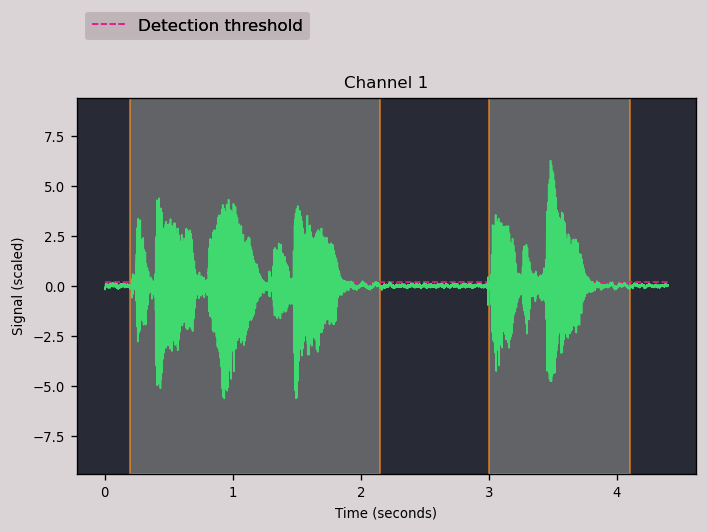

In [21]:
import auditok

region = auditok.load("tests.wav") # returns an AudioRegion object
regions = region.split_and_plot(energy_threshold=40) # or just region.splitp()

In [73]:
tests = [ {"start_time": r.meta.start, "end_time": r.meta.end} for r in regions ]

print(tests)

[{'start_time': 0.2, 'end_time': 2.15}, {'start_time': 3.0, 'end_time': 4.1}]


Generate IDs on database insert

In [74]:
# Generate IDs and insert into database
database["tests"] = [
    {"test_id": "16266a", "file_id": "01d30e", "start_time": 0.2, "end_time": 2.15 },
    {"test_id": "ca3319", "file_id": "01d30e", "start_time": 3.0, "end_time": 4.1 }
]

## 3. Simulate search job submission (possible parameters)

### 3.1 Search all queries on all tests

In [58]:
qbestd_search = {
    "queries": "_all_",
    "tests": "_all_"
}

### 3.2 Search specific queries on all test files

In [60]:
qbestd_search = {
    "queries": ["f8fd28", "daa082"], # query ids
    "tests":   "_all_"
}

### 3.3 Search specific queries on all test files, and save query set as collection

In [62]:
qbestd_search = {
    "queries": ["f8fd28", "daa082"], # query ids
    "query_collection": {"label": "Nouns"},
    "tests":   "_all_"
}

### 3.3 Search specific query on specific test files, and save test set as collection

In [78]:
qbestd_search = {
    "queries": ["f8fd28"], # query ids
    # note these are test file ids! presumably users do not want to 
    # specify individual time spans of queries to search on
    "tests":   ["01d30e", "b5670f"],
    "test_collection": {"label": "2021 Fieldwork data"}
}

## 4. Collections

### 4.1 Collection information

In [79]:
database["collections"] = [
    {"collection_id": "abed2f", "collection_label": "Nouns", "collection_type": "query"},
    {"collection_id": "0b6853", "collection_label": "2021 Fieldwork data", "collection_type": "test"}
]

### 4.1 Collection links

In [81]:
database["collection_links"] = [
    {"collection_id": "abed2f", "item_id": "f8fd28"},  # query_id 'hello'
    {"collection_id": "abed2f", "item_id": "daa082"},  # query_id 'car'
    {"collection_id": "0b6853", "item_id": "01d30e"},  # file_id  'tests.wav'
    {"collection_id": "0b6853", "item_id": "b5670f"},  # file_id  (some other test file)
]

## 5. Database view

In [82]:
import json

print(json.dumps(database, indent=2))

{
  "files": [
    {
      "file_id": "a2eb25",
      "file_name": "queries.wav",
      "file_type": "query",
      "file_hash": "a490f67f51c65d13c9bb69df30a3bf94"
    },
    {
      "file_id": "01d30e",
      "file_name": "tests.wav",
      "file_type": "test",
      "file_hash": "a87093d0206c7c0ad194d8d6473a9109"
    }
  ],
  "queries": [
    {
      "query_id": "f8fd28",
      "file_id": "a2eb25",
      "start_time": 0.935,
      "end_time": 1.493,
      "label": "hello"
    },
    {
      "query_id": "daa082",
      "file_id": "a2eb25",
      "start_time": 2.49,
      "end_time": 2.966,
      "label": "car"
    }
  ],
  "tests": [
    {
      "test_id": "16266a",
      "file_id": "01d30e",
      "start_time": 0.2,
      "end_time": 2.15
    },
    {
      "test_id": "ca3319",
      "file_id": "01d30e",
      "start_time": 3.0,
      "end_time": 4.1
    }
  ],
  "collections": [
    {
      "collection_id": "abed2f",
      "collection_label": "Nouns",
      "collection_type": "query